In [377]:
%pylab inline
import biff
import coefficients_smoothing
import pygadgetreader
import datetime

Populating the interactive namespace from numpy and matplotlib


In [410]:
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
mass = 1.577212515257997438e-06 

In [28]:
pos = np.loadtxt('./MW_100M_b1_dm_part_1e6_300.txt')


In [293]:
len(pos)*mass

1.5772125152579974

In [311]:
def write_n_batches(xyz, n_batches):
    N_particles = len(xyz)
    particles_in_barch = int(N_particles/n_batches)
    total_mass = np.sum(xyz[:,3])
    particles_mass = 1/particles_in_barch
    xyz[:,3] = np.ones(len(xyz[:,3]))*particles_mass
    for i in range(n_batches):
        np.savetxt('mwlmc_halo_sn_test_batch_{:0>3d}.txt'.format(i), xyz[(i*particles_in_barch):((i+1)*particles_in_barch)])
    return 0
    

In [312]:
write_n_batches(pos, 100)

0

In [30]:
N_particles = len(pos)
n_batches = 100
particles_in_batch = int(N_particles/n_batches)
print(particles_in_batch)

10000


In [96]:
pos[0,3]*100

0.00015772125152579974

In [108]:
sn_range = np.arange(0, 16, 2)
Hpq_mean_sn3 = np.zeros(len(sn_range))
Kpq_mean_sn4 = np.zeros(len(sn_range))
Kpq_mean_sn5 = np.zeros(len(sn_range))
n_snaps = 1


for sn in range(len(sn_range)):
    Hpq3 = np.zeros(n_snaps)
    Kpq4 = np.zeros(n_snaps)
    Kpq5 = np.zeros(n_snaps)

    for i in range(0,n_snaps):
        
        S, T = coefficients_smoothing.read_coeff_matrix('./data_KL_SN/mwlmc_hal_sn_test_coeff_sample_0000_snap_0', i+1, 20, 20, 20, 0, i+1)
        SS, TT, ST = coefficients_smoothing.read_cov_elements('./data_KL_SN/mwlmc_hal_sn_test_covmat_sample_0000_snap_0', i+1, 20, 20, 20, 0, i+1)
        S_smooth, T_smooth, N_smooth = coefficients_smoothing.smooth_coeff_matrix(S, T, SS, TT, ST, mass, 20, 20, 20, sn_range[sn])# sn
        S_0, T_0, N_smooth_0 = coefficients_smoothing.smooth_coeff_matrix(S, T, SS, TT, ST, mass, 20, 20, 20, 0)# sn
        
        
        xyz1 = np.array([pos[:i*(particles_in_batch),0],
                        pos[:i*(particles_in_batch),1],
                        pos[:i*(particles_in_batch),2]]).T
                        
        xyz2 = np.array([pos[(i+1)*(particles_in_batch):,0],
                        pos[(i+1)*(particles_in_batch):,1],
                        pos[(i+1)*(particles_in_batch):,2]]).T
        
        
        xyz = concatenate((xyz1, xyz2))
        assert(len(xyz==990000))
        
        rho_reference = biff.density(np.ascontiguousarray(xyz), S_0, T_0, M=1, r_s=40.85)       
        rho_estimate = biff.density(np.ascontiguousarray(xyz), S_smooth, T_smooth, M=1, r_s=40.85) 
        Hpq3[i] = np.sum(pos[0,3]*100*np.log(np.abs(rho_estimate))) # might be missing -1 in (n_batches-1)
        Kpq4[i] = np.sum(pos[0,3]*100*np.log(np.abs(rho_reference))) - Hpq[i]
        Kpq5[i] = np.sum(rho_reference*np.log(np.abs(rho_reference/rho_estimate))) 

        print(Hpq3[i])
        print(Kpq4[i])
        print(Kpq5[i])

    Hpq_mean_sn3[sn] = np.mean(Hpq3)
    Kpq_mean_sn4[sn] = np.mean(Kpq4)
    Kpq_mean_sn5[sn] = np.mean(Kpq5)
    
#for i in range(99):
#    pos_all = loadtxt('mwlmc_halo_sn_test_batch_{:0>3d}.txt')
    
#rho_biff = biff.density(np.ascontiguousarray(xyz), S_smooth, T_smooth, M=100, r_s=40.85)
#KL_sn3_2[i] = np.sum(mass*m_fact*np.log(rho_all2)) - np.sum(mass*m_fact*np.log(rho_biff))
#KL_sn4[i] = np.sum(mass*m_fact*np.log(rho_biff))

/home/xzk/work/github/MW-LMC-SCF/code/coefficients_smoothing.py:98: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


-2513.6945604470607
-41.345969439480086
1.4497959192883256
-2513.6945604470607
-41.345969439480086
1.4497959192883256
-2513.6945604470607
-41.345969439480086
1.4497959192883256
-2513.6945604470607
-41.345969439480086
1.4497959192883256


In [117]:
sn_range2 = [1, 2, 4, 6, 8, 10, 12, 14]

Text(0,0.5,'$K(p|q)$')

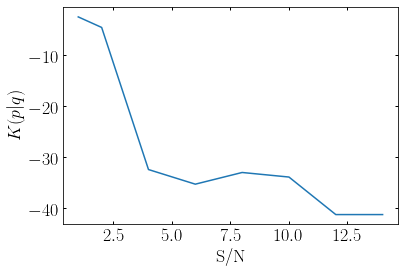

In [119]:
plot(sn_range2, Kpq_mean_sn)
xlabel('S/N')
ylabel('$K(p|q)$')

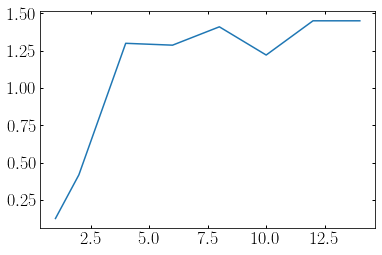

In [122]:
plot(sn_range2, Kpq_mean_sn2)

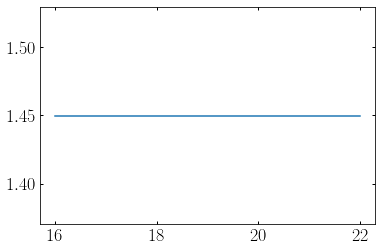

In [123]:
plot(sn_range, Kpq_mean_sn5)

In [255]:
rand2 = np.random.randint(0, 1E6, 100000)
xyz2 = np.array([pos[rand2,0], pos[rand2,1], pos[rand2,2]]).T
for i in range(len(sn2)):
    S_smooth, T_smooth, N_smooth[i] = coefficients_smoothing.smooth_coeff_matrix(S, T, SS, TT, ST, mass, 20, 20, 20, sn2[i])
    rho_biff = biff.density(np.ascontiguousarray(xyz), S_smooth, T_smooth, M=100, r_s=40.85)

    KL_sn3_2[i] = np.sum(mass*m_fact*np.log(rho_all2)) - np.sum(mass*m_fact*np.log(rho_biff))
    KL_sn4[i] = np.sum(mass*m_fact*np.log(rho_biff))


/home/xzk/work/github/MW-LMC-SCF/code/coefficients_smoothing.py:98: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


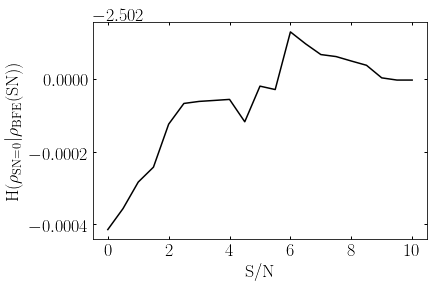

In [71]:
#plot(sn, KL_sn)
plot(sn, KL_sn2[:,0],c='k')
#plot(sn, KL_sn3-0.004, c='k', ls='--')

#plot(sn, KL_sn2*10)
#plot(sn, KL_sn3)
xlabel('S/N')
ylabel(r'$\rm{H}(\rho_{SN=0}|\rho_{BFE}(SN))$')
savefig('H_pq_sn.pdf')

Text(0,0.5,'$\\rm{H}(\\rho_{SN=0}|\\rho_{BFE}(SN))$')

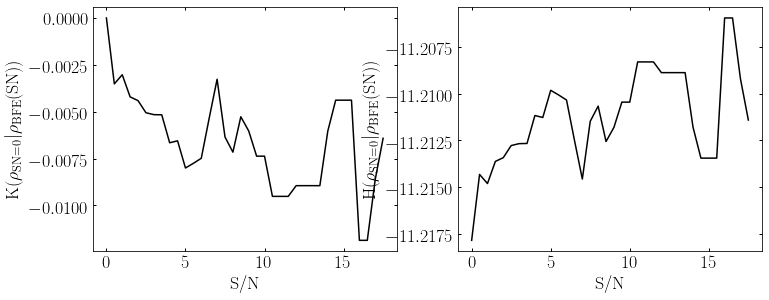

In [167]:
#plot(sn, KL_sn)
figure(figsize=(12, 4.5))

subplot(1, 2, 1)
plot(sn2, KL_sn3,c='k')
#plot(sn, KL_sn3-0.004, c='k', ls='--')
xlabel('S/N')
ylabel(r'$\rm{K}(\rho_{SN=0}|\rho_{BFE}(SN))$')

subplot(1, 2, 2)
plot(sn2, KL_sn4,c='k')
#plot(sn, KL_sn3)
xlabel('S/N')
ylabel(r'$\rm{H}(\rho_{SN=0}|\rho_{BFE}(SN))$')
#savefig('H_pq_sn.pdf')

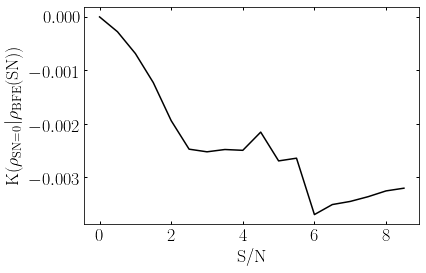

In [268]:
#plot(sn2, KL_sn3,c='C0')
plot(sn2[:18], KL_sn3_2[:18], c='k')
xlabel('S/N')
ylabel(r'$\rm{K}(\rho_{SN=0}|\rho_{BFE}(SN))$')
savefig('K_pq_sn.pdf')

In [ ]:
# how the results change with 100000 particles. k(p,q) = 0 ? 

(3, 18)

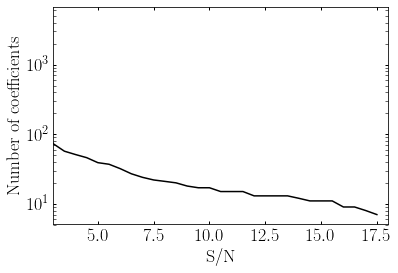

In [259]:
semilogy(sn2, N_smooth, c='k')
ylabel('Number of coefficients')
xlabel('S/N')
#savefig('Ncoeff_sn.pdf')
xlim(3, 18)

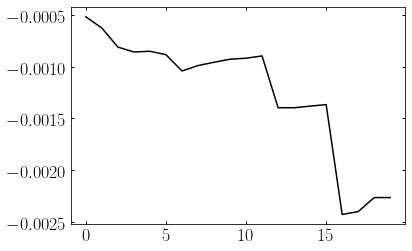

In [110]:
plot(sn2, KL_sn3,c='k')


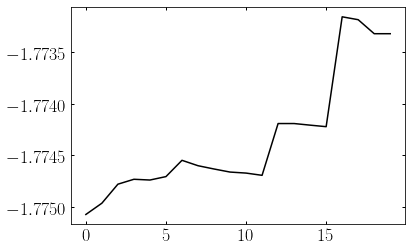

In [112]:
plot(sn2, KL_sn4,c='k')


In [384]:
r_grid = np.arange(-301, 301, 50)
x_grid, y_grid, z_grid = np.meshgrid(r_grid, r_grid, r_grid)

In [385]:
len(x_grid.flatten())

2197

In [366]:
xyz_grid = np.array([x_grid.flatten(), y_grid.flatten(), z_grid.flatten()]).T

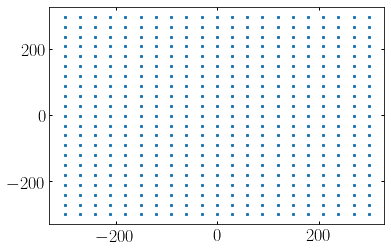

In [367]:
scatter(xyz_grid[:,0],  xyz_grid[:,1], s=1)

In [419]:
def kpq_sn_estimator(pos_grid, n_snaps):
    
    sn_range = np.arange(0, 11, 0.2)
    Hp = np.zeros((len(sn_range), n_snaps))
    Kpq = np.zeros((len(sn_range), n_snaps))
    Kpq_rho = np.zeros((len(sn_range), n_snaps))
    N_part = 990000 # len(pos_grid)
    m_p = 1/N_part
    rho_factor = 1e4/N_part
    m_p_sim = 1E-4
    N_coeff = np.zeros((len(sn_range), n_snaps))
    print(datetime.datetime.now().time())
    for i in range(5,5+n_snaps):
        S, T = coefficients_smoothing.read_coeff_matrix('./data_KL_SN/mwlmc_hal_sn_test_coeff_sample_0000_snap_0', i+1, 20, 20, 20, 0, i+1)
        SS, TT, ST = coefficients_smoothing.read_cov_elements('./data_KL_SN/mwlmc_hal_sn_test_covmat_sample_0000_snap_0', i+1, 20, 20, 20, 0, i+1)
        S_0, T_0, N_smooth_0 = coefficients_smoothing.smooth_coeff_matrix(S, T, SS, TT, ST, m_p_sim, 20, 20, 20, 0)# sn
        xyz1 = np.array([pos[:i*(particles_in_batch),0],
                        pos[:i*(particles_in_batch),1],
                        pos[:i*(particles_in_batch),2]]).T

        xyz2 = np.array([pos[(i+1)*(particles_in_batch):,0],
                        pos[(i+1)*(particles_in_batch):,1],
                        pos[(i+1)*(particles_in_batch):,2]]).T

        xyz = concatenate((xyz1, xyz2))
        assert(len(xyz==990000))
        rho_reference = biff.density(np.ascontiguousarray(xyz.astype(float)), S_0, T_0, M=1, r_s=40.85)       

        for sn in range(len(sn_range)):

            S_smooth, T_smooth, N_coeff[sn][i] = coefficients_smoothing.smooth_coeff_matrix(S, T, SS, TT, ST, m_p_sim, 20, 20, 20, sn_range[sn])


            rho_estimate = biff.density(np.ascontiguousarray(xyz.astype(float)), S_smooth, T_smooth, M=1, r_s=40.85) 
            Hp[sn][i-5] = np.sum(m_p*np.log(rho_factor*np.abs(rho_estimate))) 
            Kpq[sn][i-5] = np.sum(m_p*np.log(rho_factor*np.abs(rho_reference))) - Hp[sn][i-5]
            Kpq_rho[sn][i-5] = np.sum(rho_factor*rho_reference*np.log(np.abs(rho_reference/rho_estimate))) 

            #print(Hpq1_test[sn][i])
            #print(Kpq1_test[sn][i])
            #print(Kpq2_test[sn][i])
        print(datetime.datetime.now().time())
    return Hp, Kpq, Kpq_rho, N_coeff


In [420]:
Hp_parts2, Kpq_parts2, Kpq_rho_parts2, N_coeff_part2 = kpq_sn_estimator(1, 3)

19:51:47.980266


/home/xzk/work/github/MW-LMC-SCF/code/coefficients_smoothing.py:98: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


IndexError: index 5 is out of bounds for axis 0 with size 3

In [426]:
np.savetxt('test.txt', np.array([Hp_parts[0], Kpq_parts[0]]).T)

In [428]:
!rm -rf test.txt

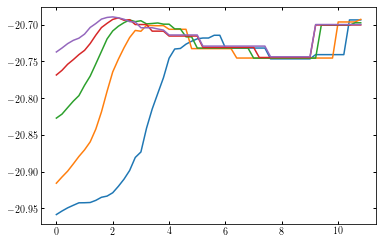

In [400]:
plot(np.arange(0, 11, 0.2), Hp_parts)

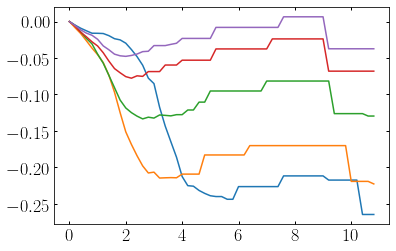

In [411]:
plot(np.arange(0, 11, 0.2), Kpq_parts)

In [405]:
Kpq_parts_mean = np.zeros(len(Hp_parts[:,0]))
for i in range(len(Hp_parts[:,0])):
    Kpq_parts_mean[i] = np.mean(Kpq_parts[i,:])

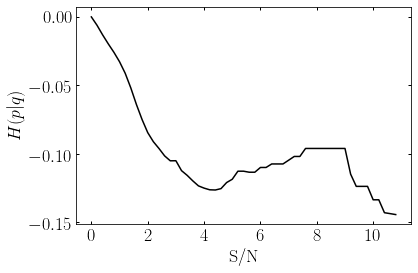

In [418]:
plot(np.arange(0, 11, 0.2), Kpq_parts_mean, c='k')
xlabel('S/N')
ylabel('$H(p|q)$')
savefig('Hpq_n_samples.pdf')

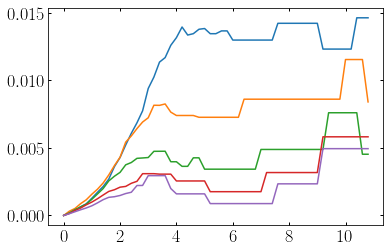

In [417]:
plot(np.arange(0, 11, 0.2), Kpq_rho_parts)

In [369]:
Hq_30, Kpq_30, Kpq_rho_30, N_coeff_30 = kpq_sn_estimator(xyz_grid, 10)

/home/xzk/work/github/MW-LMC-SCF/code/coefficients_smoothing.py:98: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [378]:
print(datetime.datetime.now())

2019-07-03 17:57:43.007971


In [381]:
print(datetime.datetime.now().time())

17:58:11.397616


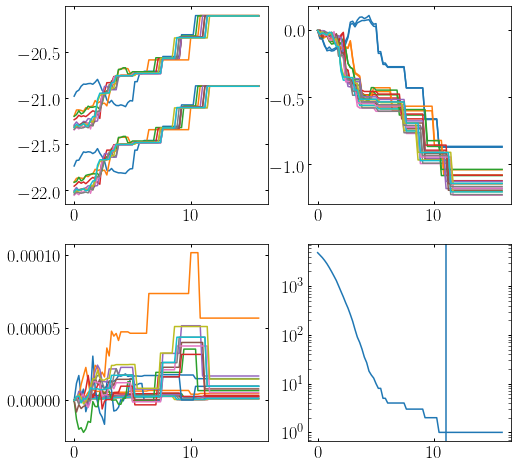

In [375]:
figure(figsize=(8, 8))
subplot(2, 2, 1)
plot(sn_range, Hp)
plot(sn_range, Hq_30)

subplot(2, 2, 2)
plot(sn_range, Kpq)
plot(sn_range, Kpq_30)

subplot(2, 2, 3)
plot(sn_range, Kpq_rho)
plot(sn_range, Kpq_rho_30)

subplot(2, 2, 4)
semilogy(sn_range, N_coeff[:,0])
axvline(11)

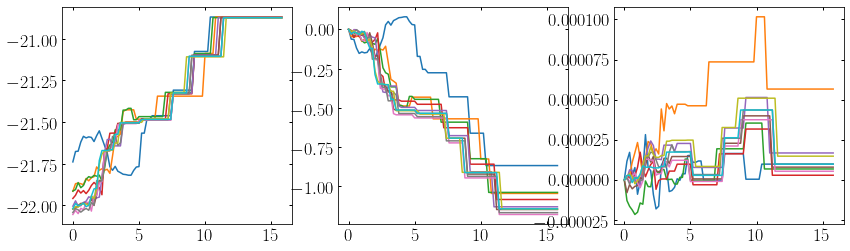

In [320]:
figure(figsize=(14, 4))
subplot(1, 3, 1)
plot(sn_range, Hp_2x)

subplot(1, 3, 2)
plot(sn_range, Kpq_2x)

subplot(1, 3, 3)
plot(sn_range, Kpq_rho_2x)

In [373]:
Hp_mean = np.zeros(len(Hp[:,0]))
Kpq_mean = np.zeros(len(Kpq[:,0]))
Kpq_rho_mean = np.zeros(len(Kpq_rho[:,0]))

for i in range(len(Hp[:,0])):
    Hp_mean[i] = np.mean(Hq[i,:])
    Kpq_mean[i] = np.mean(Kpq[i,:])
    Kpq_rho_mean[i] = np.mean(Kpq_rho[i,:])
    
Hp_mean_30 = np.zeros(len(Hq_30[:,0]))
Kpq_mean_30 = np.zeros(len(Kpq_30[:,0]))
Kpq_rho_mean_30 = np.zeros(len(Kpq_rho_30[:,0]))

for i in range(len(Hq_30[:,0])):
    Hp_mean_30[i] = np.mean(Hq_30[i,:])
    Kpq_mean_30[i] = np.mean(Kpq_30[i,:])
    Kpq_rho_mean_30[i] = np.mean(Kpq_rho_30[i,:])

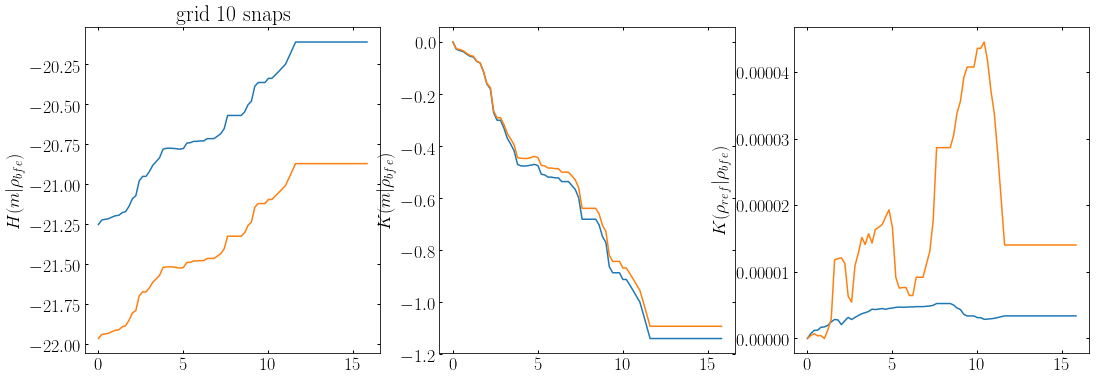

In [374]:
figure(figsize=(18, 6))
subplot(1, 3, 1)
title('grid 10 snaps')
plot(sn_range, Hp_mean)
plot(sn_range, Hp_mean_30)
ylabel(r'$H(m|\rho_{bfe})$')
subplot(1, 3, 2)
plot(sn_range, Kpq_mean)
plot(sn_range, Kpq_mean_30)
ylabel(r'$K(m|\rho_{bfe})$')

subplot(1, 3, 3)
plot(sn_range, Kpq_rho_mean)
plot(sn_range, Kpq_rho_mean_30)
ylabel(r'$K(\rho_{ref}|\rho_{bfe})$')

savefig('results_100_snaps_grid.pdf')

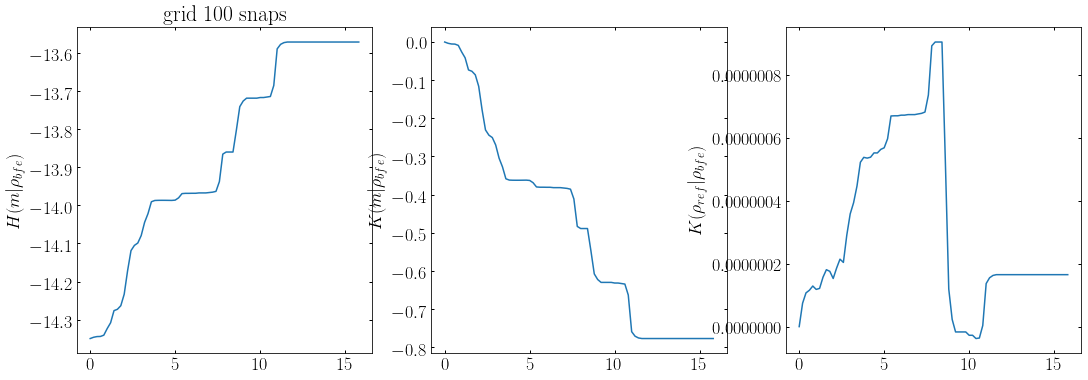

In [284]:
figure(figsize=(18, 6))
subplot(1, 3, 1)
title('grid 100 snaps')
plot(sn_range, Hpq_1_test_mean)
ylabel(r'$H(m|\rho_{bfe})$')
subplot(1, 3, 2)
plot(sn_range, Kpq_1_test_mean)
ylabel(r'$K(m|\rho_{bfe})$')

subplot(1, 3, 3)
plot(sn_range, Kpq_2_test_mean)
ylabel(r'$K(\rho_{ref}|\rho_{bfe})$')

savefig('results_100_snaps_grid.pdf')

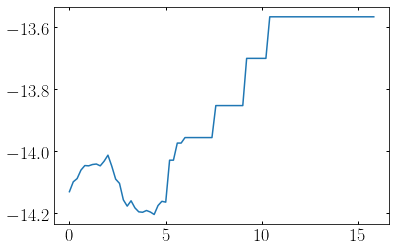

In [246]:
plot(sn_range, Hpq1_test)

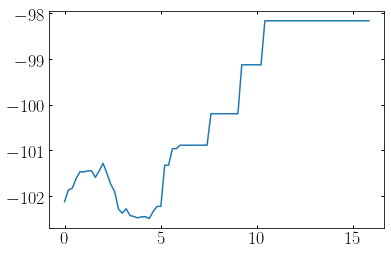

In [252]:
plot(sn_range, Hpq1_test)

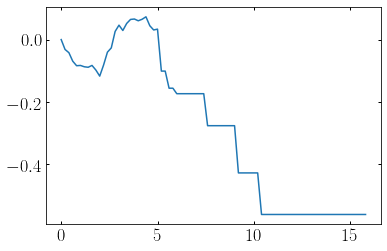

In [244]:
plot(sn_range, Kpq1_test)

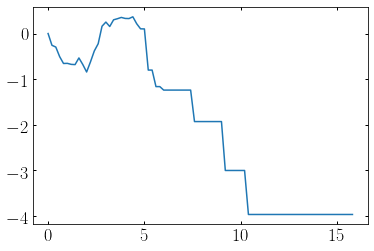

In [253]:
plot(sn_range, Kpq1_test)

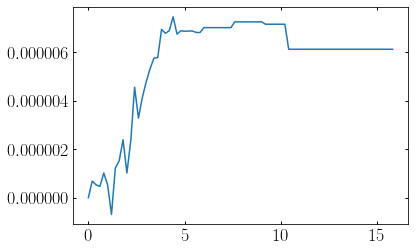

In [245]:
plot(sn_range, Kpq2_test)

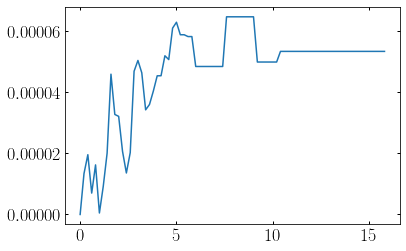

In [254]:
plot(sn_range, Kpq2_test)

In [222]:
np.sum(np.log((np.abs(rho_reference)/np.abs(rho_estimate))))

-3571.917533576019

In [200]:
np.sum(np.log((np.abs(rho_reference)/np.abs(rho_estimate))))

nan

In [208]:
np.log(rho_reference[400])

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

In [473]:
K_100M = np.zeros((48,55))
H_100M = np.zeros((48,55))
H_rho_100M = np.zeros((48,55))

for i in range(0, 48):
    data = np.loadtxt('./data_KL_SN/MW_100M_b1_dm_part_1e6_300_KL_analysis_batch_{:0>3d}.txt'.format(i))
    K_100M[i] = data[:,0]
    H_100M[i] = data[:,1]
    H_rho_100M[i] = data[:,2]

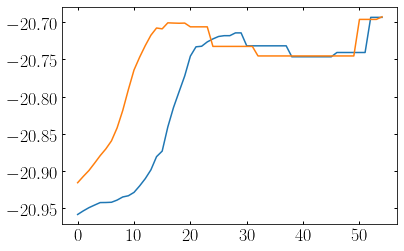

In [474]:
plot(K_100M[0])
plot(K_100M[1])

In [480]:
sn_range =  np.arange(0, 11, 0.2)

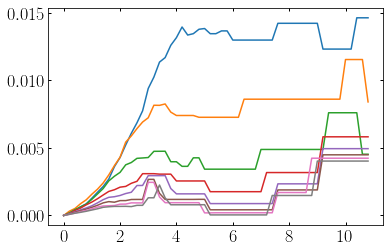

In [495]:
for i in range(8):
    plot(sn_range, H_rho_100M[i])

In [482]:
H_100M[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [496]:
mean_H = np.zeros(55)
for i in range(55):
    mean_H[i] = np.mean(H_rho_100M[:,i])

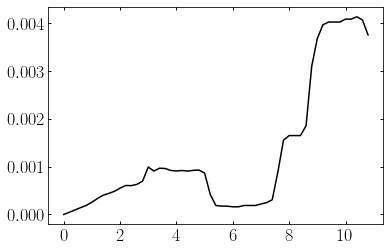

In [497]:
plot(sn_range, mean_H, c='k')